**Airline Loyalty Program**
Customer loyalty program data from Northern Lights Air (NLA), a fictitious airline based in Canada. In an effort to improve program enrollment, NLA ran a promotion between Feb - Apr 2018. Dataset includes loyalty program signups, enrollment and cancellation details, and additional customer information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
import matplotlib.dates as mdates

In [2]:
sns.set_theme(style="whitegrid", palette="tab10")
sns.set_context("notebook", font_scale=1.1)
plt.style.use('dark_background')

In [3]:
fligth_df  = pd.read_csv(r"C:\Users\somph\Documents\data_project\airline_royalty\data_airline_loyalty\Customer Flight Activity.csv")
royalty_df = pd.read_csv(r"C:\Users\somph\Documents\data_project\airline_royalty\data_airline_loyalty\Customer Loyalty History.csv")
calendar_df = pd.read_csv(r"C:\Users\somph\Documents\data_project\airline_royalty\data_airline_loyalty\Calendar.csv")

In [4]:
fligth_df.head()

,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [5]:
royalty_df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
calendar_df["Month"] = pd.to_datetime(calendar_df["Date"]).dt.month
calendar_df["Year"] = pd.to_datetime(calendar_df["Date"]).dt.year
calendar_df.head()

,Date,Start of Year,Start of Quarter,Start of Month,Month,Year
0,2012-01-01,2012-01-01,2012-01-01,2012-01-01,1,2012
1,2012-01-02,2012-01-01,2012-01-01,2012-01-01,1,2012
2,2012-01-03,2012-01-01,2012-01-01,2012-01-01,1,2012
3,2012-01-04,2012-01-01,2012-01-01,2012-01-01,1,2012
4,2012-01-05,2012-01-01,2012-01-01,2012-01-01,1,2012


In [7]:
print(royalty_df["Enrollment Year"].max())

2018


**Promotion Effectiveness:**

H0 (Null Hypothesis): The 2018 promotional campaign had no impact on the number of loyalty sign-ups.

H1 (Alternative Hypothesis): The 2018 promotional campaign led to a significant increase in sign-ups.

In [8]:
royalty_df["Enrollment Type"].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [9]:
royalty_df["Enrollment Type"].unique()

array(['Standard', '2018 Promotion'], dtype=object)

In [10]:
promotion_test = royalty_df.copy()
promotion_test["test_group"] = promotion_test["Enrollment Type"].apply(lambda x: "test" if x == "2018 Promotion" else "control")

In [11]:
promotion_test.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,test_group
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,control
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,control
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,control
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,control
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,control


In [12]:
promotion_test.isnull().sum()

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
test_group                0
dtype: int64

In [13]:
promotion_test = promotion_test.groupby(["Enrollment Year", "Enrollment Month"])["Loyalty Number"].count().reset_index(name="Signups")
promotion_test


,Enrollment Year,Enrollment Month,Signups
0,2012,4,62
1,2012,5,203
2,2012,6,195
3,2012,7,213
4,2012,8,206
...,...,...,...
76,2018,8,218
77,2018,9,185
78,2018,10,213
79,2018,11,246


<Axes: >

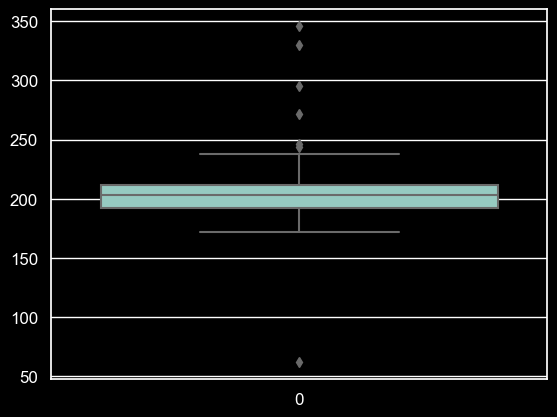

In [14]:
sns.boxplot(data=promotion_test["Signups"])

<Axes: >

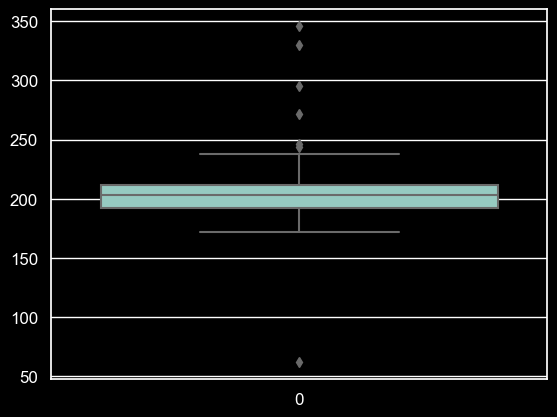

In [15]:
sns.boxplot(data=promotion_test["Signups"])

c:\Users\somph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


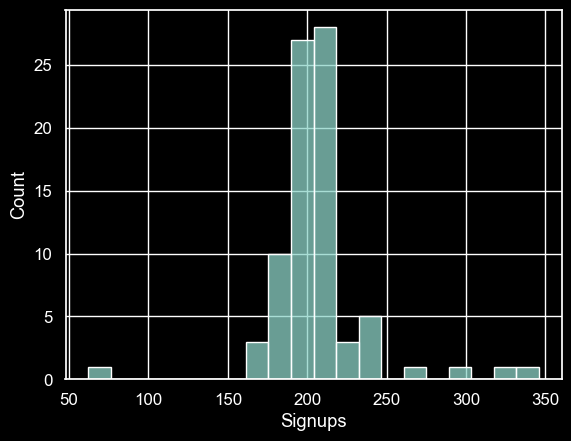

Skewness: 0.8672156924057355


In [16]:
sns.histplot(data= promotion_test["Signups"], bins = 20)
plt.show()
skewness_value = skew(promotion_test["Signups"])
print(f"Skewness: {skewness_value}")


In [17]:
promotions_period = (promotion_test["Enrollment Month"].isin([2,3,4]) ) & (promotion_test["Enrollment Year"] == 2018)
test_group = promotion_test[promotions_period]["Signups"]
control_group = promotion_test[~promotions_period]["Signups"]

In [18]:
print(f"Test Group Size: {len(test_group)}")
print(f"Control Group Size: {len(control_group)}")

Test Group Size: 3
Control Group Size: 78


In [19]:
t_test,p_value = stats.ttest_ind(test_group,control_group,equal_var= False)
print(f"t-test: {t_test}")
print(f"p-value: {p_value}")

t-test: 7.944364121776659
p-value: 0.012855915442901024


In [20]:
mean_diff = test_group.mean() - control_group.mean()
pooled_std = np.sqrt((test_group.var() + control_group.var()) / 2)
cohen_d = mean_diff / pooled_std

print(f"Cohen's d: {cohen_d}") 

Cohen's d: 4.866232921734129


c:\Users\somph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\somph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


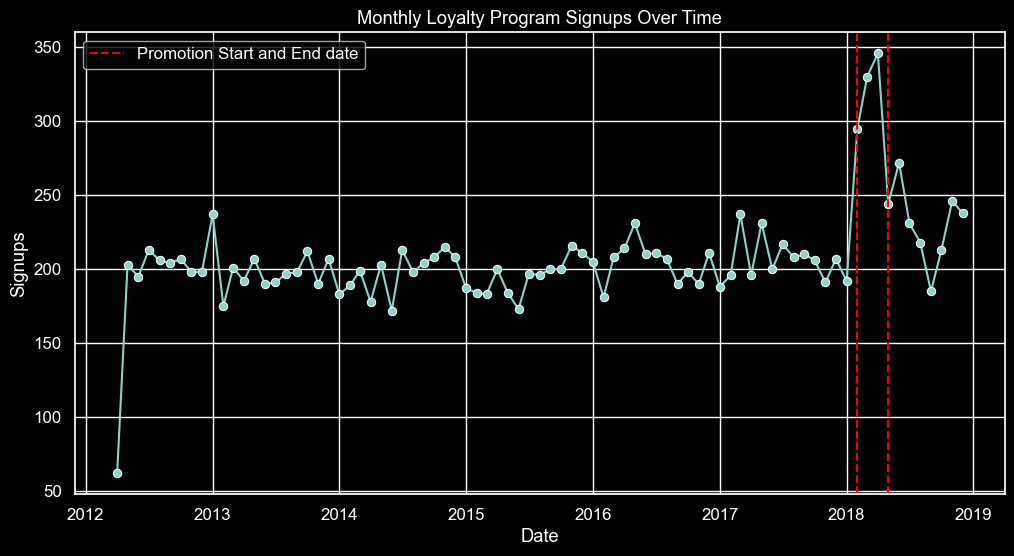

In [21]:
trend_df = promotion_test.groupby(["Enrollment Year", "Enrollment Month"])["Signups"].sum().reset_index()
trend_df["date"] = pd.to_datetime(trend_df["Enrollment Year"].astype(str) + "-" + trend_df["Enrollment Month"].astype(str) + "-01")
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, x="date", y="Signups", marker="o")
plt.axvline(pd.to_datetime("2018-02-01"), color='red', linestyle="--", label="Promotion Start and End date")
plt.axvline(pd.to_datetime("2018-04-30"), color='red', linestyle="--")
plt.xlabel("Date")
plt.ylabel("Signups")
plt.title("Monthly Loyalty Program Signups Over Time")
plt.legend()
plt.show()


In [22]:
test_group_cutoff = promotion_test[
    (promotion_test["Enrollment Year"] >= 2013) & 
    (promotion_test["Enrollment Month"].isin([2, 3, 4])) & 
    (promotion_test["Enrollment Year"] == 2018)
]["Signups"]

control_group_cutoff = promotion_test[
    (promotion_test["Enrollment Year"] >= 2013) & 
    ~((promotion_test["Enrollment Month"].isin([2, 3, 4])) & (promotion_test["Enrollment Year"] == 2018))
]["Signups"]

t_test_cutoff, p_value_cutoff = stats.ttest_ind(test_group_cutoff, control_group_cutoff, equal_var = False)
print(f"t-test:{t_test_cutoff}")
print(f"p-value:{p_value_cutoff}")

t-test:7.856171036606433
p-value:0.013932056840142254


Using 95% confident interval, with p-value of 0.0139, the Null Hypothesis is rejected. Positive t-value shows the promotion is effectively increase royalty program enrollment. 

In [23]:
mean_diff_cutoff = test_group_cutoff.mean() - control_group_cutoff.mean()
pooled_std_cutoff = np.sqrt((test_group_cutoff.var() + control_group_cutoff.var()) / 2)
cohen_d_cutoff = mean_diff_cutoff / pooled_std_cutoff

print(f"Cohen's d: {cohen_d_cutoff}") 

Cohen's d: 5.27955018923411


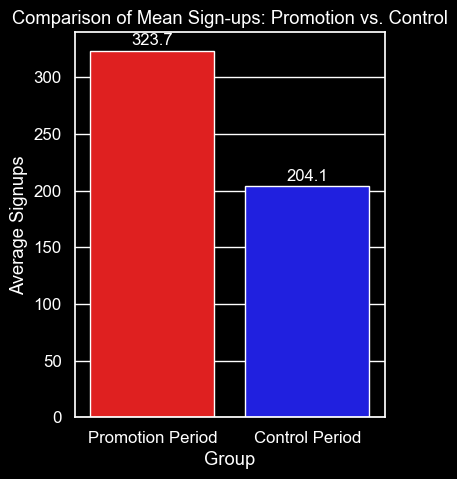

In [24]:
mean_test = test_group_cutoff.mean()
mean_control = control_group_cutoff.mean()

plot_df = pd.DataFrame({
    "Group": ["Promotion Period", "Control Period"],
    "Mean Signups": [mean_test, mean_control]
})
plt.figure(figsize=(4, 5))
sns.barplot(data=plot_df, x="Group", y="Mean Signups", errorbar=('ci', 95), palette=["red", "blue"])
plt.ylabel("Average Signups")
plt.xlabel("Group")
plt.title("Comparison of Mean Sign-ups: Promotion vs. Control")

for index, value in enumerate(plot_df["Mean Signups"]):
    plt.text(index, value + 5, f"{value:.1f}", ha='center', fontsize=12)

plt.show()


**Points Redemption and Retention:**

H0: Redeeming loyalty points has no effect on customer retention.

H1: Customers who redeem points are more likely to remain active in the program.

In [25]:
royalty_test = royalty_df[royalty_df["Enrollment Year"] >= 2013].copy()
royalty_test["is_royal"] = royalty_test["Cancellation Month"].isnull().astype(int)

In [26]:
royalty_test = royalty_test.groupby(["Enrollment Year", "Enrollment Month"])["is_royal"].sum().reset_index(name= "Active")

In [27]:
test_group_royalty = royalty_test[
    ( royalty_test["Enrollment Year"] >= 2013) & 
    ( royalty_test["Enrollment Month"].isin([2, 3, 4])) & 
    ( royalty_test["Enrollment Year"] == 2018)
]["Active"]

control_group_royalty = royalty_test[
    ( royalty_test["Enrollment Year"] >= 2013) & 
    ~((royalty_test["Enrollment Month"].isin([2, 3, 4])) & ( royalty_test["Enrollment Year"] == 2018))
]["Active"]

t_test_royalty, p_value_royalty = stats.ttest_ind(test_group_royalty, control_group_royalty, equal_var = False)
print(f"t-test:{t_test_royalty}")
print(f"p-value:{p_value_royalty}")

t-test:8.485943254072186
p-value:0.009791666282892209


In [28]:
mean_diff_royal = test_group_royalty.mean() - control_group_royalty.mean()
pooled_std_royal = np.sqrt((test_group_royalty.var() + control_group_royalty.var()) / 2)
cohen_d_royal = mean_diff_royal / pooled_std_royal

print(f"Cohen's d: {cohen_d_royal}") 

Cohen's d: 4.743083117618423


**Retention & Churn Analysis**

In [29]:
royalty_df.info()
royalty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [30]:
Loyalty= royalty_df[royalty_df["Enrollment Year"] >= 2013].copy()
Loyalty["is_royal"] = Loyalty["Cancellation Month"].isnull().astype(int)
Loyalty = Loyalty.groupby(["Enrollment Year" , "Enrollment Month"]).agg(Signups =("Loyalty Number", "count"), Active = ("is_royal", "sum")).reset_index()


c:\Users\somph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\somph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


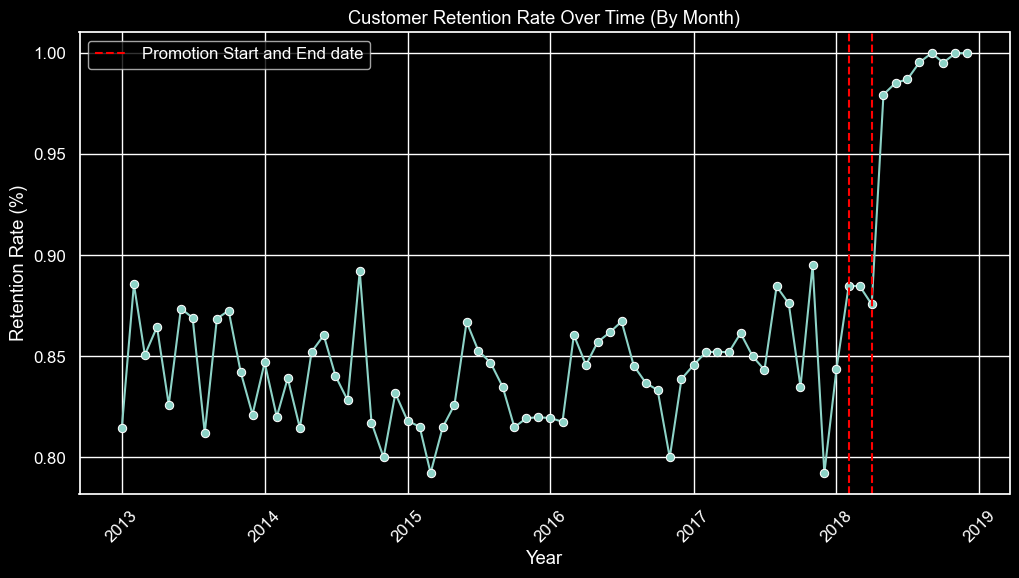

In [31]:
Loyalty["Retention Rate"] = Loyalty["Active"] / Loyalty["Signups"]
Loyalty["Year-Month"] = pd.to_datetime(Loyalty["Enrollment Year"].astype(str) + "-" + Loyalty["Enrollment Month"].astype(str).str.zfill(2))
Loyalty = Loyalty.sort_values("Year-Month")

plt.figure(figsize=(12, 6))
sns.lineplot(data=Loyalty, x="Year-Month", y="Retention Rate", marker="o")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.axvline(pd.to_datetime("2018-02"), color='red', linestyle="--", label="Promotion Start and End date")
plt.axvline(pd.to_datetime("2018-04"), color='red', linestyle="--")
plt.xlabel("Year")
plt.ylabel("Retention Rate (%)")
plt.title("Customer Retention Rate Over Time (By Month)")
plt.legend()
plt.show()
